<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện

In [7]:
import cv2
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, RMSprop,SGD

# Load và xử lý data

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_pre = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# Tạo model

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

#ANN
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

# Compile và train

In [10]:
opt= SGD(lr=0.01,momentum = 0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs= 50,batch_size=64,validation_data=(x_test,y_test),verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
782/782 [==============================] - 104s 132ms/step - loss: 1.5255 - accuracy: 0.4419 - val_loss: 1.3927 - val_accuracy: 0.4852
Epoch 2/50
782/782 [==============================] - 100s 128ms/step - loss: 1.1195 - accuracy: 0.6025 - val_loss: 1.0360 - val_accuracy: 0.6305
Epoch 3/50
782/782 [==============================] - 100s 128ms/step - loss: 0.9370 - accuracy: 0.6693 - val_loss: 0.9321 - val_accuracy: 0.6767
Epoch 4/50
782/782 [==============================] - 100s 128ms/step - loss: 0.8258 - accuracy: 0.7093 - val_loss: 0.9086 - val_accuracy: 0.6903
Epoch 5/50
782/782 [==============================] - 101s 129ms/step - loss: 0.7217 - accuracy: 0.7463 - val_loss: 0.8862 - val_accuracy: 0.7010
Epoch 6/50
782/782 [==============================] - 99s 127ms/step - loss: 0.6588 - accuracy: 0.7697 - val_loss: 0.9107 - val_accuracy: 0.6935
Epoch 7/50
782/782 [==============================] - 99s 127ms/step - loss: 0.5838 - accuracy: 0.7935 - val_loss: 0.8703 - v

In [11]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 19ms/step - loss: 2.2504 - accuracy: 0.7152
Test score: 2.250410556793213
Test accuracy: 0.7152000069618225


# Vẽ đồ thị

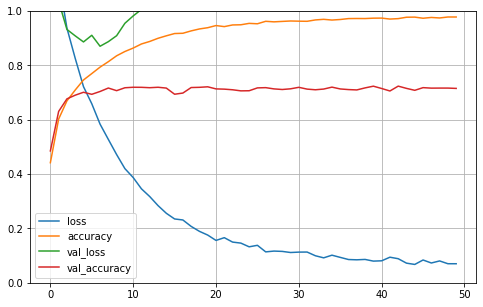

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

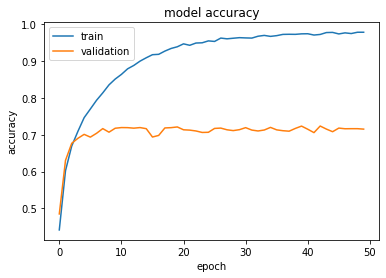

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# Kiểm tra

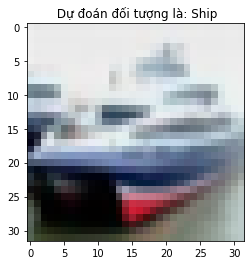

In [15]:
Label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

test = 1
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

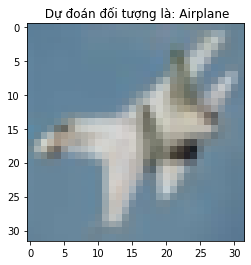

In [16]:
test = 10
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

In [17]:
model.save('CNN_CIFA10.h5')